In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('air-traffic-passenger-statistics.csv')

## Exploratory Data Analysis

In [7]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [9]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [10]:
df['Operating Airline'].unique()

array(['ATA Airlines', 'Air Canada', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas Air

In [11]:
df['Operating Airline'].nunique()

89

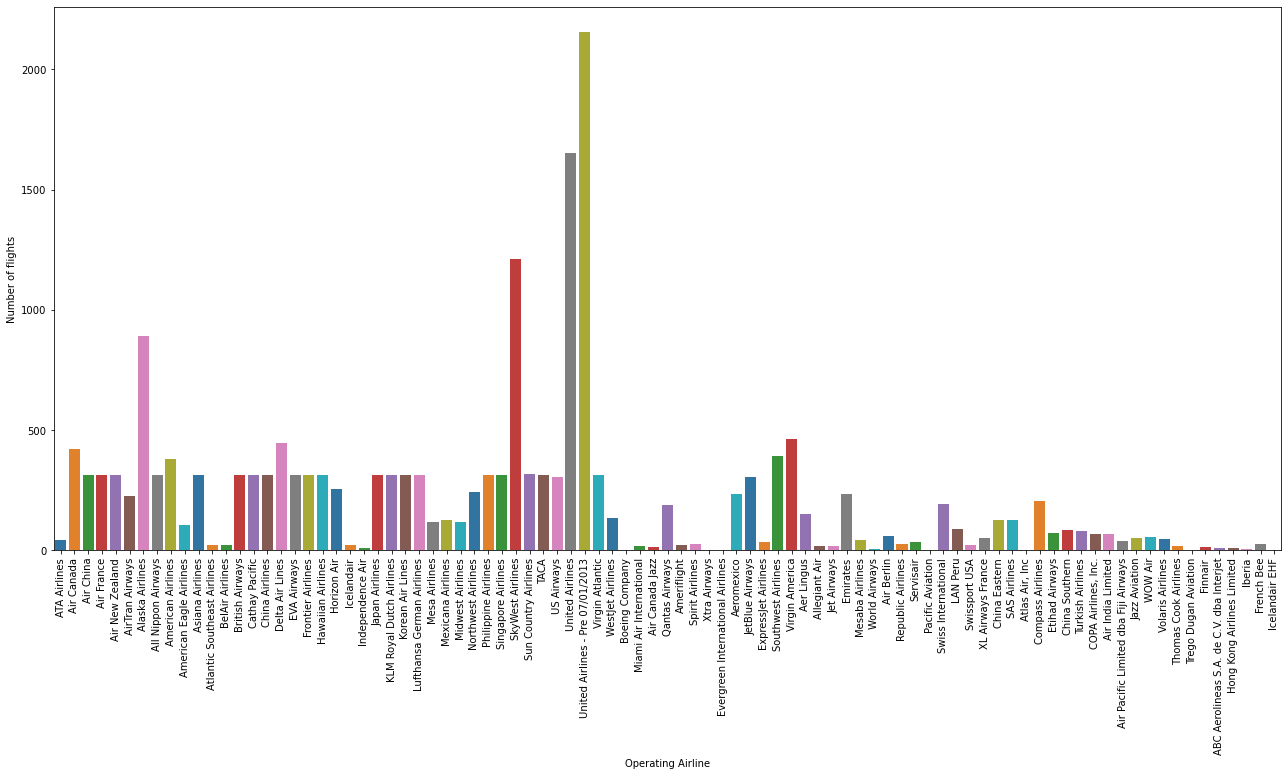

In [12]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'Operating Airline', data=df, palette = 'tab10')
plt.xticks(rotation = 90)
plt.ylabel('Number of flights')
plt.show()

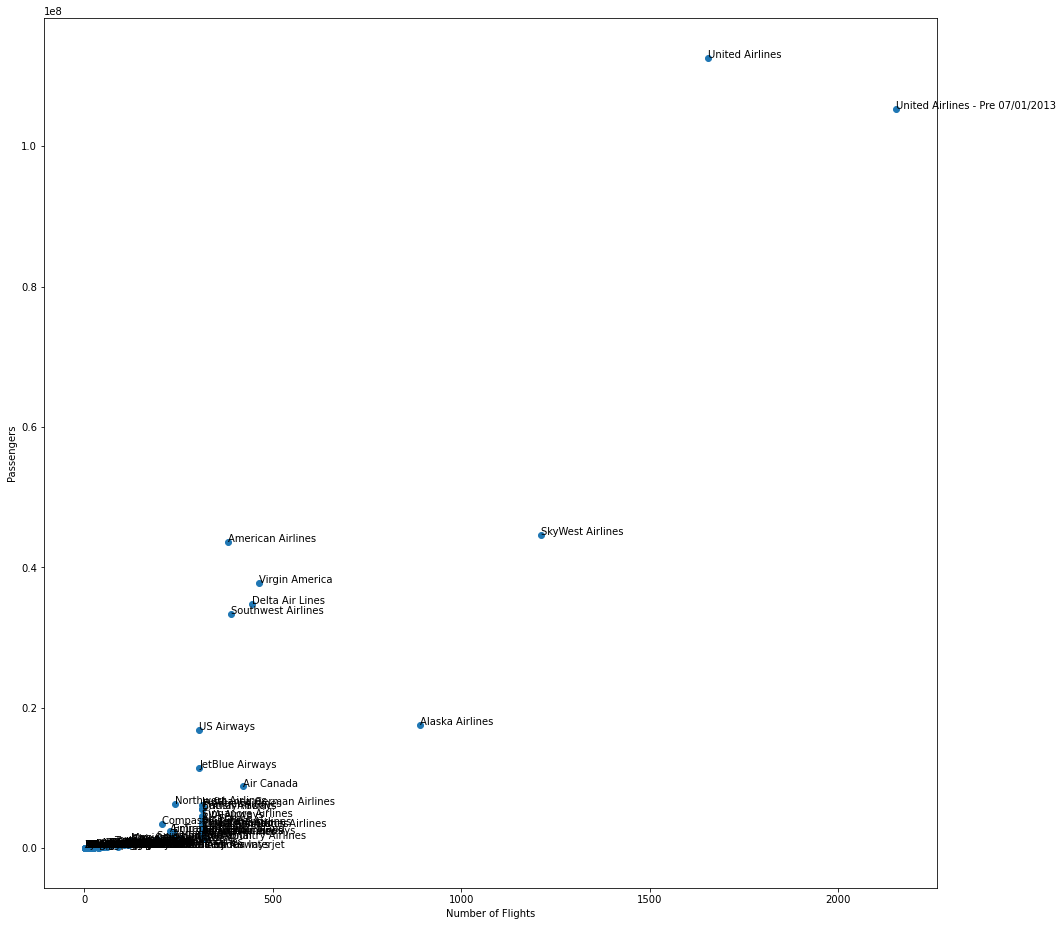

In [13]:
airline_count = df['Operating Airline'].value_counts()
airline_count.sort_index(inplace=True)
passenger_count = df.groupby('Operating Airline').sum()['Passenger Count']
passenger_count.sort_index(inplace=True)
from sklearn.preprocessing import scale
x = airline_count.values
y = passenger_count.values
plt.figure(figsize=(16,16))
plt.scatter(x,y)
plt.xlabel('Number of Flights')
plt.ylabel('Passengers')
for i, txt in enumerate(airline_count.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i],y[i]))
plt.show()

## Modelling

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
from sklearn.cluster import KMeans

In [19]:
dfcopy = df.copy()

In [20]:
dfa = dfcopy[["Passenger Count","Operating Airline","Activity Period"]]

In [21]:
dfa

,Passenger Count,Operating Airline,Activity Period
0,27271,ATA Airlines,200507
1,29131,ATA Airlines,200507
2,5415,ATA Airlines,200507
3,35156,Air Canada,200507
4,34090,Air Canada,200507
...,...,...,...
18880,50,WOW Air,201806
18881,10868,WestJet Airlines,201806
18882,11664,WestJet Airlines,201806
18883,804,XL Airways France,201806


In [22]:
df_dummies = pd.get_dummies(dfa,drop_first=True)

In [23]:
df_dummies

,Passenger Count,Activity Period,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,...,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,27271,200507,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29131,200507,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5415,200507,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35156,200507,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34090,200507,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,201806,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18881,10868,201806,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18882,11664,201806,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18883,804,201806,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
model = KMeans(random_state = 42)

In [40]:
model.fit_predict(df_dummies)

array([0, 0, 3, ..., 3, 3, 3])

In [41]:
#ssd = sum of squared distance
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df_dummies)
    ssd.append(model.inertia_)

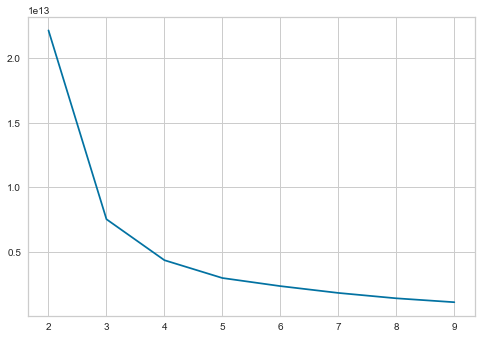

In [42]:
sns.lineplot(x=K, y = ssd)
plt.show()

In [43]:
ssd

[22163987705778.598,
 7525329901884.385,
 4349026550572.5117,
 2968265416681.476,
 2340796933048.442,
 1812166392627.7651,
 1395057471021.429,
 1093259212972.9886]

In [44]:
from yellowbrick.cluster import KElbowVisualizer

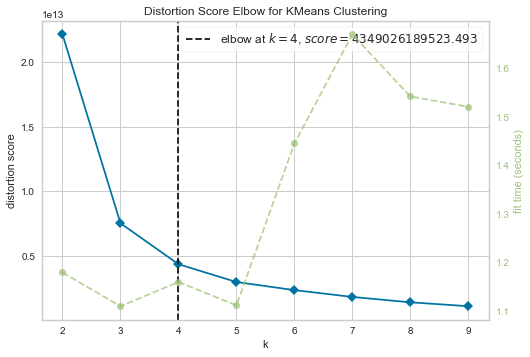

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_dummies)
visu.poof()

In [46]:
model = KMeans(n_clusters=4)
model.fit(df_dummies)

KMeans(n_clusters=4)

In [47]:
dfcopy["cluster"] = model.labels_

In [48]:
dfcopy["cluster"].value_counts()

2    15349
0     2007
3     1138
1      391
Name: cluster, dtype: int64

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
silhouette_score(df_dummies, dfcopy.cluster)

0.7852585462492334

In [52]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_dummies)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_dummies, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8594457321408892
For n_clusters=3, the silhouette score is 0.828186224717071
For n_clusters=4, the silhouette score is 0.7852585462492334
For n_clusters=5, the silhouette score is 0.7836235858084323
For n_clusters=6, the silhouette score is 0.6585676857222619
For n_clusters=7, the silhouette score is 0.6591386908621336
For n_clusters=8, the silhouette score is 0.6420180378397884


In [53]:
dfcopy

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,cluster
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,0
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50,2
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868,2
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664,2
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804,2


In [54]:
dfcopy[dfcopy["cluster"]==0]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,cluster
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,0
13,200507,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Deplaned,Other,International,A,36641,0
14,200507,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,International,A,39379,0
39,200507,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,97510,0
40,200507,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,93791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18804,201806,JetBlue Airways,B6,JetBlue Airways,B6,Domestic,US,Enplaned,Low Fare,International,A,72862,0
18853,201806,United Airlines,UA,United Airlines,UA,International,Asia,Deplaned,Other,International,G,78711,0
18854,201806,United Airlines,UA,United Airlines,UA,International,Asia,Enplaned,Other,International,G,87725,0
18865,201806,United Airlines,UA,United Airlines,UA,International,Europe,Deplaned,Other,International,G,48386,0


In [55]:
dfcopy[dfcopy["cluster"]==1]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,cluster
93,200507,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,443656,1
94,200507,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,F,421802,1
212,200508,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,420430,1
213,200508,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,F,398135,1
330,200509,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,357533,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18736,201806,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 2,D,306070,1
18847,201806,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,E,336895,1
18848,201806,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,E,335810,1
18850,201806,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,506400,1


In [56]:
dfcopy[dfcopy["cluster"]==2]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,cluster
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50,2
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868,2
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664,2
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804,2


In [57]:
dfcopy[dfcopy["cluster"]==3]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,cluster
23,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,166577,3
24,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,160890,3
77,200507,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,103279,3
78,200507,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,F,102023,3
138,200508,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,162064,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,201806,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,206721,3
18827,201806,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,149286,3
18828,201806,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,153973,3
18832,201806,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Deplaned,Low Fare,Terminal 1,B,170911,3


In [58]:
dfcopy.groupby("cluster").mean()

,Activity Period,Passenger Count
cluster,,
0,201093.365720,59802.532636
1,201251.907928,358077.271100
2,201180.241579,9207.895824
3,201292.976274,143109.340070
